In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models

## Load Data

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 
    'worm'
]

Files already downloaded and verified
Files already downloaded and verified


## Select Device

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Model 1

In [22]:
class BaselineConvolutionModel(nn.Module):
    def __init__(self):
        super(BaselineConvolutionModel,self).__init__()
        self.conv_layer_one = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3 , stride=1, padding=1)
        self.conv_layer_two = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, stride=1, padding=1)
        self.conv_layer_three = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, stride=1, padding=1)
        self.conv_layer_four = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, stride=1, padding=1)
        self.conv_layer_five = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3, stride=1, padding=1)
        self.conv_layer_six = nn.Conv2d(in_channels=512,out_channels=1024,kernel_size=3, stride=1, padding=1)
    
        self.batchNorm = nn.BatchNorm2d(3)
        
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)             
    def forward(self, x):
        x = self.batchNorm(x)
        x = self.conv_layer_one(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.conv_layer_two(x)
        x = F.elu(x)
        x = F.avg_pool2d(x,(2,2))
        
        x = self.conv_layer_three(x)
        x = F.elu(x)
        x = F.avg_pool2d(x,(2,2))
        
        x = self.conv_layer_four(x)
        x = F.elu(x)
        x = F.avg_pool2d(x,(2,2))
        
        x = self.conv_layer_five(x)
        x = F.elu(x)
        x = F.avg_pool2d(x,(2,2))
        
        x = self.conv_layer_six(x)
        x = F.elu(x)
        
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.elu(x)
        x = self.fc2(x)
        x = F.elu(x)
        x = self.fc3(x)
        return x

## Model 2

In [23]:
class ConvutionModelAddedLayersBatchNorm(nn.Module):
    def __init__(self):
        super(ConvutionModelAddedLayersBatchNorm, self).__init__()
        self.conv_layer_one = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3 , stride=1, padding=1)
        self.conv_layer_two = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, stride=1, padding=1)
        self.conv_layer_three = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, stride=1, padding=1)
        self.conv_layer_four = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, stride=1, padding=1)
        self.conv_layer_five = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3, stride=1, padding=1)
        self.conv_layer_six = nn.Conv2d(in_channels=512,out_channels=1024,kernel_size=3, stride=1, padding=1)
        self.conv_layer_seven = nn.Conv2d(in_channels=1024,out_channels=2048,kernel_size=3, stride=1, padding=1)
    
        self.batchNorm3 = nn.BatchNorm2d(3)
        self.batchNorm512 = nn.BatchNorm2d(512)
        
        self.fc1 = nn.Linear(8192, 4096)
        self.fc2 = nn.Linear(4096, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 512)
        self.fc5 = nn.Linear(512, 256)
        self.fc6 = nn.Linear(256, 100)
  
        
    def forward(self, x):
        x = self.batchNorm3(x)
        x = self.conv_layer_one(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.conv_layer_two(x)
        x = F.elu(x)
        
        x = self.conv_layer_three(x)
        x = F.elu(x)
        
        x = self.conv_layer_four(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.conv_layer_five(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.batchNorm512(x)
        x = self.conv_layer_six(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.conv_layer_seven(x)
        x = F.elu(x)
        
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.elu(x)
        x = self.fc2(x)
        x = F.elu(x)
        x = self.fc3(x)
        x = F.elu(x)
        x = self.fc4(x)
        x = F.elu(x)
        x = self.fc5(x)
        x = F.elu(x)
        x = self.fc6(x)
        return x

## Model 3

In [24]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, in_dim, heads):
        super(MultiHeadAttentionWrapper, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=in_dim, num_heads=heads, batch_first=True)

    def forward(self, x):
        # Store original shape
        original_shape = x.shape  # New line to store original shape

        # Reshape x for attention
        batch_size, channels, height, width = x.size()
        x = x.flatten(2).permute(0, 2, 1)

        # Apply attention
        attn_output, _ = self.attention(x, x, x)

        # Restore attn_output to original shape
        attn_output = attn_output.permute(0, 2, 1).contiguous()
        attn_output = attn_output.view(batch_size, channels, height, width)

        # Restore x to its original shape
        x = x.permute(0, 2, 1).contiguous().view(original_shape)  # New line to restore x's shape

        return attn_output + x


In [25]:
class ResNetMultiheadAttention(nn.Module):
    def __init__(self):
        super(ResNetMultiheadAttention, self).__init__()
        # Load pretrained ResNet-18
        self.resnet = models.resnet18(weights=None)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 100)

        # Modify layers to include multi-head attention
        self.layer1 = self._add_attention_to_layer(self.resnet.layer1, 64, 2)
        self.layer2 = self._add_attention_to_layer(self.resnet.layer2, 128, 4)
        self.layer3 = self._add_attention_to_layer(self.resnet.layer3, 256, 8)
        self.layer4 = self._add_attention_to_layer(self.resnet.layer4, 512, 8)

    def _add_attention_to_layer(self, layer, in_dim, heads):
        new_layer = []
        for block in layer:
            new_layer.append(block)
            new_layer.append(MultiHeadAttentionWrapper(in_dim, heads))
        return nn.Sequential(*new_layer)

    def forward(self, x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.resnet.fc(x)

        return x

## Model 4

In [26]:
class AlexNetModified(nn.Module):
    def __init__(self):
        super(AlexNetModified, self).__init__()
        self.conv_layer_one = nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11 , stride=4, padding=1)
        self.conv_layer_two = nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5, stride=1, padding=2)
        self.conv_layer_three = nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3, stride=1, padding=1)
        self.conv_layer_four = nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3, stride=1, padding=1)
        self.conv_layer_five = nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3, stride=1, padding=1)

        # Compared to the original architecture, I had to add more linear
        self.fc1 = nn.Linear(6400, 4096)
        self.fc2 = nn.Linear(4096, 2048)
        self.fc3 = nn.Linear(2048, 1000)
        self.fc4 = nn.Linear(1000, 500)
        self.fc5 = nn.Linear(500, 100)
        
        self.batchNorm1 = nn.BatchNorm2d(3)
        self.batchNorm2 = nn.BatchNorm2d(384)
  
        
    def forward(self, x):
        ## Since the images are 32,32 we map it to 224,224
        ## Test whether 
        transform = transforms.Compose([transforms.RandomResizedCrop(224,antialias=True)])
        x = transform(x)
        
        x = self.batchNorm1(x)
        x = self.conv_layer_one(x)
        x = F.relu(x)
        x = F.max_pool2d(x,(3,3),stride=2)
        
        x = self.conv_layer_two(x)
        x = F.relu(x)
        x = F.max_pool2d(x,(3,3),stride=2)
        
        x = self.conv_layer_three(x)
        x = F.relu(x)
        
        x = self.batchNorm2(x)
        x = self.conv_layer_four(x)
        x = F.relu(x)
        
        x = self.conv_layer_five(x)
        x = F.relu(x)
        x = F.max_pool2d(x,(3,3),stride=2)
        
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x) 
        x = F.relu(x)
        x = self.fc4(x) 
        x = F.relu(x)
        x = self.fc5(x) 
        return x


## Maximum Voting Ensemble

In [27]:
# adapted from: https://discuss.pytorch.org/t/custom-ensemble-approach/52024/4
class MaximumVotingConvolutionalEnsemble(nn.Module):
    def __init__(self, model1, model2, model3, model4, nb_classes=100):
        super(MaximumVotingConvolutionalEnsemble, self).__init__()
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3
        self.model4 = model4
        # Remove last linear layer
        self.model1.fc = nn.Identity()
        self.model2.fc = nn.Identity()
        self.model3.fc = nn.Identity()
        self.model4.fc = nn.Identity()
                
    def forward(self, x):
        x1 = self.model1(x.clone())  
        x1 = x1.view(x1.size(0), -1)
        
        x2 = self.model2(x)
        x2 = x2.view(x2.size(0), -1)
        
        x3 = self.model3(x)
        x3 = x3.view(x3.size(0), -1)
        
        x4 = self.model4(x)
        x4 = x4.view(x4.size(0), -1)

        x = torch.max(x1,torch.max(torch.max(x2,x3),x4))
        return x

## Voting Ensemble

In [28]:
# adapted from: https://discuss.pytorch.org/t/custom-ensemble-approach/52024/4
class VotingConvolutionalEnsemble(nn.Module):
    def __init__(self, model1, model2, model3, model4, nb_classes=100):
        super(VotingConvolutionalEnsemble, self).__init__()
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3
        self.model4 = model4
        # Remove last linear layer
        self.model1.fc = nn.Identity()
        self.model2.fc = nn.Identity()
        self.model3.fc = nn.Identity()
        self.model4.fc = nn.Identity()
                
    def forward(self, x):
        x1 = self.model1(x.clone())  
        x1 = x1.view(x1.size(0), -1)
        
        x2 = self.model2(x)
        x2 = x2.view(x2.size(0), -1)
        
        x3 = self.model3(x)
        x3 = x3.view(x3.size(0), -1)
        
        x4 = self.model4(x)
        x4 = x4.view(x4.size(0), -1)
        
        x = (x1 + x2 + x3 + x4)/4
        return x

## Bagging Ensemble

In [29]:
# adapted from: https://discuss.pytorch.org/t/custom-ensemble-approach/52024/4
class BaggingConvolutionalEnsemble(nn.Module):
    def __init__(self, model1, model2, model3, model4, nb_classes=100):
        super(BaggingConvolutionalEnsemble, self).__init__()
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3
        self.model4 = model4
        # Remove last linear layer
        self.model1.fc = nn.Identity()
        self.model2.fc = nn.Identity()
        self.model3.fc = nn.Identity()
        self.model4.fc = nn.Identity()
        
        self.classifier = nn.Linear(400, nb_classes)
                
    def forward(self, x):
        x1 = self.model1(x.clone())  
        x1 = x1.view(x1.size(0), -1)
        
        x2 = self.model2(x)
        x2 = x2.view(x2.size(0), -1)
        
        x3 = self.model3(x)
        x3 = x3.view(x3.size(0), -1)
        
        x4 = self.model4(x)
        x4 = x4.view(x4.size(0), -1)
        
        x = torch.cat((x1, x2, x3, x4), dim=1)
        x = self.classifier(F.elu(x))
        return x

## Model 1 Training

In [30]:
model_one = BaselineConvolutionModel()
model_one.to(device)
loss_func = nn.CrossEntropyLoss()  
opt = optim.SGD(model_one.parameters(), lr=0.001, momentum=0.9) 

In [31]:
avg_losses = []   # Avg. losses.
epochs = 25      # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = model_one(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 4.605
[epoch: 0, i:  1999] avg mini-batch loss: 4.606
[epoch: 0, i:  2999] avg mini-batch loss: 4.606
[epoch: 0, i:  3999] avg mini-batch loss: 4.607
[epoch: 0, i:  4999] avg mini-batch loss: 4.608
[epoch: 0, i:  5999] avg mini-batch loss: 4.606
[epoch: 0, i:  6999] avg mini-batch loss: 4.606
[epoch: 0, i:  7999] avg mini-batch loss: 4.606
[epoch: 0, i:  8999] avg mini-batch loss: 4.605
[epoch: 0, i:  9999] avg mini-batch loss: 4.601
[epoch: 0, i: 10999] avg mini-batch loss: 4.562
[epoch: 0, i: 11999] avg mini-batch loss: 4.487
[epoch: 1, i:   999] avg mini-batch loss: 4.430
[epoch: 1, i:  1999] avg mini-batch loss: 4.363
[epoch: 1, i:  2999] avg mini-batch loss: 4.335
[epoch: 1, i:  3999] avg mini-batch loss: 4.316
[epoch: 1, i:  4999] avg mini-batch loss: 4.308
[epoch: 1, i:  5999] avg mini-batch loss: 4.274
[epoch: 1, i:  6999] avg mini-batch loss: 4.233
[epoch: 1, i:  7999] avg mini-batch loss: 4.177
[epoch: 1, i:  8999] avg mini-batch loss

## Model 1 Training Loss Plot

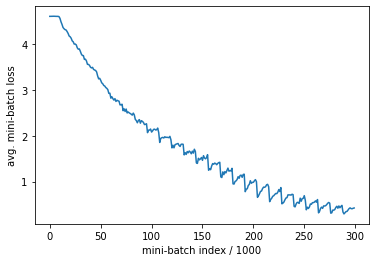

In [32]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

## Evaluate Model 1 on Test Set

In [33]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_one(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 46 %


## Evaluate Model 1 Across Classes

In [34]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_one(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 59 %
Accuracy of aquarium_fish : 64 %
Accuracy of  baby : 24 %
Accuracy of  bear : 26 %
Accuracy of beaver : 34 %
Accuracy of   bed : 54 %
Accuracy of   bee : 45 %
Accuracy of beetle : 58 %
Accuracy of bicycle : 57 %
Accuracy of bottle : 58 %
Accuracy of  bowl : 17 %
Accuracy of   boy : 33 %
Accuracy of bridge : 56 %
Accuracy of   bus : 33 %
Accuracy of butterfly : 25 %
Accuracy of camel : 32 %
Accuracy of   can : 31 %
Accuracy of castle : 67 %
Accuracy of caterpillar : 38 %
Accuracy of cattle : 33 %
Accuracy of chair : 78 %
Accuracy of chimpanzee : 55 %
Accuracy of clock : 48 %
Accuracy of cloud : 52 %
Accuracy of cockroach : 53 %
Accuracy of couch : 44 %
Accuracy of  crab : 47 %
Accuracy of crocodile : 24 %
Accuracy of   cup : 58 %
Accuracy of dinosaur : 56 %
Accuracy of dolphin : 34 %
Accuracy of elephant : 52 %
Accuracy of flatfish : 50 %
Accuracy of forest : 62 %
Accuracy of   fox : 49 %
Accuracy of  girl : 33 %
Accuracy of hamster : 44 %
Accuracy of house : 42

## Model 2 Training

In [35]:
model_two = ConvutionModelAddedLayersBatchNorm()
model_two.to(device)
loss_func = nn.CrossEntropyLoss()  
opt = optim.SGD(model_two.parameters(), lr=0.001, momentum=0.9) 

In [36]:
avg_losses = []   # Avg. losses.
epochs = 30      # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = model_two(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 4.575
[epoch: 0, i:  1999] avg mini-batch loss: 4.380
[epoch: 0, i:  2999] avg mini-batch loss: 4.173
[epoch: 0, i:  3999] avg mini-batch loss: 4.080
[epoch: 0, i:  4999] avg mini-batch loss: 3.978
[epoch: 0, i:  5999] avg mini-batch loss: 3.894
[epoch: 0, i:  6999] avg mini-batch loss: 3.807
[epoch: 0, i:  7999] avg mini-batch loss: 3.701
[epoch: 0, i:  8999] avg mini-batch loss: 3.635
[epoch: 0, i:  9999] avg mini-batch loss: 3.529
[epoch: 0, i: 10999] avg mini-batch loss: 3.487
[epoch: 0, i: 11999] avg mini-batch loss: 3.423
[epoch: 1, i:   999] avg mini-batch loss: 3.233
[epoch: 1, i:  1999] avg mini-batch loss: 3.179
[epoch: 1, i:  2999] avg mini-batch loss: 3.202
[epoch: 1, i:  3999] avg mini-batch loss: 3.130
[epoch: 1, i:  4999] avg mini-batch loss: 3.080
[epoch: 1, i:  5999] avg mini-batch loss: 2.991
[epoch: 1, i:  6999] avg mini-batch loss: 2.942
[epoch: 1, i:  7999] avg mini-batch loss: 2.956
[epoch: 1, i:  8999] avg mini-batch loss

## Model 2 Training Plot

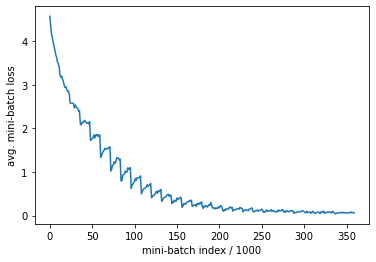

In [37]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

## Evaluate Model 2 on Test Set

In [38]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_two(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 44 %


##  Evaluate Model 2 Across Classes

In [39]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_two(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 73 %
Accuracy of aquarium_fish : 56 %
Accuracy of  baby : 35 %
Accuracy of  bear : 23 %
Accuracy of beaver : 24 %
Accuracy of   bed : 39 %
Accuracy of   bee : 47 %
Accuracy of beetle : 41 %
Accuracy of bicycle : 64 %
Accuracy of bottle : 61 %
Accuracy of  bowl : 42 %
Accuracy of   boy : 28 %
Accuracy of bridge : 15 %
Accuracy of   bus : 39 %
Accuracy of butterfly : 39 %
Accuracy of camel : 33 %
Accuracy of   can : 47 %
Accuracy of castle : 68 %
Accuracy of caterpillar : 28 %
Accuracy of cattle : 39 %
Accuracy of chair : 75 %
Accuracy of chimpanzee : 51 %
Accuracy of clock : 40 %
Accuracy of cloud : 59 %
Accuracy of cockroach : 73 %
Accuracy of couch : 28 %
Accuracy of  crab : 40 %
Accuracy of crocodile : 22 %
Accuracy of   cup : 67 %
Accuracy of dinosaur : 34 %
Accuracy of dolphin : 29 %
Accuracy of elephant : 44 %
Accuracy of flatfish : 35 %
Accuracy of forest : 42 %
Accuracy of   fox : 50 %
Accuracy of  girl : 23 %
Accuracy of hamster : 42 %
Accuracy of house : 36

## Model 3 Training

In [40]:
model_three = ResNetMultiheadAttention()
model_three.to(device)
loss_func = nn.CrossEntropyLoss()  
opt = optim.SGD(model_three.parameters(), lr=0.001, momentum=0.9) 

In [41]:
avg_losses = []   # Avg. losses.
epochs = 100      # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = model_three(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 4.690
[epoch: 0, i:  1999] avg mini-batch loss: 4.461
[epoch: 0, i:  2999] avg mini-batch loss: 4.379
[epoch: 0, i:  3999] avg mini-batch loss: 4.255
[epoch: 0, i:  4999] avg mini-batch loss: 4.204
[epoch: 0, i:  5999] avg mini-batch loss: 4.189
[epoch: 0, i:  6999] avg mini-batch loss: 4.121
[epoch: 0, i:  7999] avg mini-batch loss: 4.111
[epoch: 0, i:  8999] avg mini-batch loss: 4.021
[epoch: 0, i:  9999] avg mini-batch loss: 3.987
[epoch: 0, i: 10999] avg mini-batch loss: 3.970
[epoch: 0, i: 11999] avg mini-batch loss: 3.919
[epoch: 1, i:   999] avg mini-batch loss: 3.869
[epoch: 1, i:  1999] avg mini-batch loss: 3.838
[epoch: 1, i:  2999] avg mini-batch loss: 3.819
[epoch: 1, i:  3999] avg mini-batch loss: 3.828
[epoch: 1, i:  4999] avg mini-batch loss: 3.793
[epoch: 1, i:  5999] avg mini-batch loss: 3.786
[epoch: 1, i:  6999] avg mini-batch loss: 3.730
[epoch: 1, i:  7999] avg mini-batch loss: 3.722
[epoch: 1, i:  8999] avg mini-batch loss

## Model 3 Training Plot

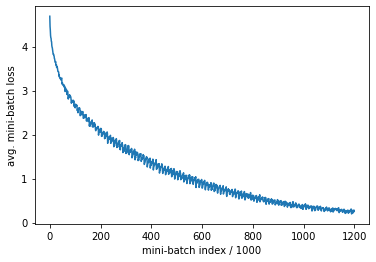

In [42]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

## Evaluate Model 3 on Test Set

In [43]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_three(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 39 %


## Evaluate Model 3 Across Classes

In [44]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_three(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 61 %
Accuracy of aquarium_fish : 53 %
Accuracy of  baby : 27 %
Accuracy of  bear : 21 %
Accuracy of beaver : 25 %
Accuracy of   bed : 45 %
Accuracy of   bee : 33 %
Accuracy of beetle : 35 %
Accuracy of bicycle : 46 %
Accuracy of bottle : 48 %
Accuracy of  bowl : 23 %
Accuracy of   boy : 30 %
Accuracy of bridge : 43 %
Accuracy of   bus : 41 %
Accuracy of butterfly : 30 %
Accuracy of camel : 30 %
Accuracy of   can : 42 %
Accuracy of castle : 54 %
Accuracy of caterpillar : 26 %
Accuracy of cattle : 35 %
Accuracy of chair : 69 %
Accuracy of chimpanzee : 47 %
Accuracy of clock : 46 %
Accuracy of cloud : 55 %
Accuracy of cockroach : 50 %
Accuracy of couch : 26 %
Accuracy of  crab : 33 %
Accuracy of crocodile : 24 %
Accuracy of   cup : 64 %
Accuracy of dinosaur : 39 %
Accuracy of dolphin : 52 %
Accuracy of elephant : 37 %
Accuracy of flatfish : 44 %
Accuracy of forest : 32 %
Accuracy of   fox : 23 %
Accuracy of  girl : 25 %
Accuracy of hamster : 28 %
Accuracy of house : 38

## Model 4 Training

In [45]:
model_four =AlexNetModified()
model_four.to(device)
loss_func = nn.CrossEntropyLoss()  
opt = optim.SGD(model_four.parameters(), lr=0.001, momentum=0.9) 

In [46]:
avg_losses = []   # Avg. losses.
epochs = 30      
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = model_four(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 4.606
[epoch: 0, i:  1999] avg mini-batch loss: 4.603
[epoch: 0, i:  2999] avg mini-batch loss: 4.558
[epoch: 0, i:  3999] avg mini-batch loss: 4.482
[epoch: 0, i:  4999] avg mini-batch loss: 4.410
[epoch: 0, i:  5999] avg mini-batch loss: 4.354
[epoch: 0, i:  6999] avg mini-batch loss: 4.307
[epoch: 0, i:  7999] avg mini-batch loss: 4.259
[epoch: 0, i:  8999] avg mini-batch loss: 4.242
[epoch: 0, i:  9999] avg mini-batch loss: 4.210
[epoch: 0, i: 10999] avg mini-batch loss: 4.172
[epoch: 0, i: 11999] avg mini-batch loss: 4.145
[epoch: 1, i:   999] avg mini-batch loss: 4.112
[epoch: 1, i:  1999] avg mini-batch loss: 4.083
[epoch: 1, i:  2999] avg mini-batch loss: 4.068
[epoch: 1, i:  3999] avg mini-batch loss: 4.038
[epoch: 1, i:  4999] avg mini-batch loss: 4.027
[epoch: 1, i:  5999] avg mini-batch loss: 3.989
[epoch: 1, i:  6999] avg mini-batch loss: 3.991
[epoch: 1, i:  7999] avg mini-batch loss: 3.947
[epoch: 1, i:  8999] avg mini-batch loss

## Model 4 Training Plot

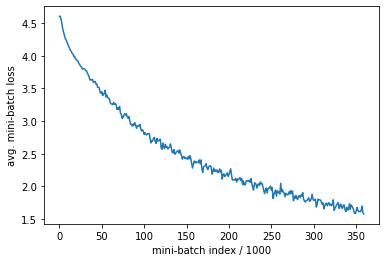

In [47]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

## Evaluate Model 4 on Test Set

In [48]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_four(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 42 %


## Evaluate Model 4 Across Classes

In [49]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_four(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 75 %
Accuracy of aquarium_fish : 53 %
Accuracy of  baby : 35 %
Accuracy of  bear : 16 %
Accuracy of beaver : 18 %
Accuracy of   bed : 35 %
Accuracy of   bee : 48 %
Accuracy of beetle : 42 %
Accuracy of bicycle : 46 %
Accuracy of bottle : 49 %
Accuracy of  bowl : 29 %
Accuracy of   boy : 25 %
Accuracy of bridge : 44 %
Accuracy of   bus : 33 %
Accuracy of butterfly : 38 %
Accuracy of camel : 39 %
Accuracy of   can : 52 %
Accuracy of castle : 68 %
Accuracy of caterpillar : 50 %
Accuracy of cattle : 27 %
Accuracy of chair : 62 %
Accuracy of chimpanzee : 65 %
Accuracy of clock : 37 %
Accuracy of cloud : 63 %
Accuracy of cockroach : 63 %
Accuracy of couch : 14 %
Accuracy of  crab : 26 %
Accuracy of crocodile : 29 %
Accuracy of   cup : 47 %
Accuracy of dinosaur : 33 %
Accuracy of dolphin : 32 %
Accuracy of elephant : 36 %
Accuracy of flatfish : 29 %
Accuracy of forest : 38 %
Accuracy of   fox : 43 %
Accuracy of  girl : 22 %
Accuracy of hamster : 51 %
Accuracy of house : 31

# Construct Ensembles

## Maximum Vote Ensemble

In [50]:
max_vote_convolutional_ensemble = MaximumVotingConvolutionalEnsemble(model_one,model_two,model_three, model_four)

# Freeze these models
for param in model_one.parameters():
    param.requires_grad_(False)

for param in model_two.parameters():
    param.requires_grad_(False)
    
for param in model_three.parameters():
    param.requires_grad_(False)
    
max_vote_convolutional_ensemble.to(device)

MaximumVotingConvolutionalEnsemble(
  (model1): BaselineConvolutionModel(
    (conv_layer_one): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_two): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_three): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_four): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_five): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_six): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc1): Linear(in_features=1024, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=256, bias=True)
    (fc3): Linear(in_features=256, out_features=100, bias=True)
    (fc): Identity()
  )
  (model2): ConvutionModelAddedLayersBatchNorm(
    (conv_layer_one): Con

##  Evaluate Maximum Voting Ensemble on Test Set

In [51]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = max_vote_convolutional_ensemble(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 50 %


## Evaluate Maximum Voting Ensemble Across Classes on Test Set

In [52]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = max_vote_convolutional_ensemble(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 60 %
Accuracy of aquarium_fish : 66 %
Accuracy of  baby : 37 %
Accuracy of  bear : 29 %
Accuracy of beaver : 38 %
Accuracy of   bed : 58 %
Accuracy of   bee : 49 %
Accuracy of beetle : 60 %
Accuracy of bicycle : 59 %
Accuracy of bottle : 58 %
Accuracy of  bowl : 25 %
Accuracy of   boy : 36 %
Accuracy of bridge : 55 %
Accuracy of   bus : 35 %
Accuracy of butterfly : 38 %
Accuracy of camel : 37 %
Accuracy of   can : 39 %
Accuracy of castle : 73 %
Accuracy of caterpillar : 43 %
Accuracy of cattle : 41 %
Accuracy of chair : 80 %
Accuracy of chimpanzee : 60 %
Accuracy of clock : 53 %
Accuracy of cloud : 63 %
Accuracy of cockroach : 68 %
Accuracy of couch : 45 %
Accuracy of  crab : 47 %
Accuracy of crocodile : 30 %
Accuracy of   cup : 67 %
Accuracy of dinosaur : 53 %
Accuracy of dolphin : 37 %
Accuracy of elephant : 53 %
Accuracy of flatfish : 50 %
Accuracy of forest : 58 %
Accuracy of   fox : 61 %
Accuracy of  girl : 35 %
Accuracy of hamster : 50 %
Accuracy of house : 43

## Voting Ensemble

In [53]:
avg_vote_conv_ensemble = VotingConvolutionalEnsemble(model_one,model_two,model_three, model_four)

# Freeze these models
for param in model_one.parameters():
    param.requires_grad_(False)

for param in model_two.parameters():
    param.requires_grad_(False)
    
for param in model_three.parameters():
    param.requires_grad_(False)
    
avg_vote_conv_ensemble.to(device)

VotingConvolutionalEnsemble(
  (model1): BaselineConvolutionModel(
    (conv_layer_one): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_two): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_three): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_four): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_five): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_six): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc1): Linear(in_features=1024, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=256, bias=True)
    (fc3): Linear(in_features=256, out_features=100, bias=True)
    (fc): Identity()
  )
  (model2): ConvutionModelAddedLayersBatchNorm(
    (conv_layer_one): Conv2d(3, 

## Evaluate Voting Ensemble on Test Set 

In [54]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = avg_vote_conv_ensemble(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


## Evaluate Voting Ensemble on Test Set Across Classes

In [55]:
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = avg_vote_conv_ensemble(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 75 %
Accuracy of aquarium_fish : 68 %
Accuracy of  baby : 42 %
Accuracy of  bear : 39 %
Accuracy of beaver : 43 %
Accuracy of   bed : 57 %
Accuracy of   bee : 65 %
Accuracy of beetle : 58 %
Accuracy of bicycle : 66 %
Accuracy of bottle : 67 %
Accuracy of  bowl : 46 %
Accuracy of   boy : 38 %
Accuracy of bridge : 55 %
Accuracy of   bus : 58 %
Accuracy of butterfly : 56 %
Accuracy of camel : 46 %
Accuracy of   can : 56 %
Accuracy of castle : 79 %
Accuracy of caterpillar : 55 %
Accuracy of cattle : 48 %
Accuracy of chair : 83 %
Accuracy of chimpanzee : 72 %
Accuracy of clock : 57 %
Accuracy of cloud : 76 %
Accuracy of cockroach : 75 %
Accuracy of couch : 46 %
Accuracy of  crab : 54 %
Accuracy of crocodile : 44 %
Accuracy of   cup : 76 %
Accuracy of dinosaur : 57 %
Accuracy of dolphin : 48 %
Accuracy of elephant : 54 %
Accuracy of flatfish : 54 %
Accuracy of forest : 66 %
Accuracy of   fox : 62 %
Accuracy of  girl : 39 %
Accuracy of hamster : 60 %
Accuracy of house : 58

# Bagging Ensemble

In [56]:
bagging_conv_ensemble = BaggingConvolutionalEnsemble(model_one,model_two,model_three,model_four)

# Freeze these models
for param in model_one.parameters():
    param.requires_grad_(False)

for param in model_two.parameters():
    param.requires_grad_(False)
    
for param in model_three.parameters():
    param.requires_grad_(False)
    
bagging_conv_ensemble.to(device)

BaggingConvolutionalEnsemble(
  (model1): BaselineConvolutionModel(
    (conv_layer_one): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_two): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_three): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_four): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_five): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_six): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc1): Linear(in_features=1024, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=256, bias=True)
    (fc3): Linear(in_features=256, out_features=100, bias=True)
    (fc): Identity()
  )
  (model2): ConvutionModelAddedLayersBatchNorm(
    (conv_layer_one): Conv2d(3,

## Evaluate Bagging Ensemble on Test Set 

In [57]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = bagging_conv_ensemble(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 1 %


## Evaluate Bagging Ensemble on Test Set Across Classes

In [58]:
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = bagging_conv_ensemble(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple :  0 %
Accuracy of aquarium_fish :  3 %
Accuracy of  baby :  0 %
Accuracy of  bear :  9 %
Accuracy of beaver :  2 %
Accuracy of   bed :  0 %
Accuracy of   bee :  0 %
Accuracy of beetle :  0 %
Accuracy of bicycle :  0 %
Accuracy of bottle :  0 %
Accuracy of  bowl :  2 %
Accuracy of   boy :  1 %
Accuracy of bridge :  0 %
Accuracy of   bus :  0 %
Accuracy of butterfly :  1 %
Accuracy of camel :  0 %
Accuracy of   can :  0 %
Accuracy of castle :  0 %
Accuracy of caterpillar :  2 %
Accuracy of cattle :  0 %
Accuracy of chair :  0 %
Accuracy of chimpanzee :  3 %
Accuracy of clock :  0 %
Accuracy of cloud :  0 %
Accuracy of cockroach :  0 %
Accuracy of couch :  0 %
Accuracy of  crab :  0 %
Accuracy of crocodile :  0 %
Accuracy of   cup :  0 %
Accuracy of dinosaur :  0 %
Accuracy of dolphin :  1 %
Accuracy of elephant :  0 %
Accuracy of flatfish :  0 %
Accuracy of forest :  0 %
Accuracy of   fox :  0 %
Accuracy of  girl :  0 %
Accuracy of hamster :  0 %
Accuracy of house :  2

## Results
1. First ensemble gave an accuracy of 50%
2. Second ensemble gave an accuracy of 58%
3. Third ensemble gave an accuracy of 1%.